In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model, naive_bayes, neighbors, svm
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('sample_submission.csv')

In [64]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [65]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
PassengerId     8693 non-null object
HomePlanet      8492 non-null object
CryoSleep       8476 non-null object
Cabin           8494 non-null object
Destination     8511 non-null object
Age             8514 non-null float64
VIP             8490 non-null object
RoomService     8512 non-null float64
FoodCourt       8510 non-null float64
ShoppingMall    8485 non-null float64
Spa             8510 non-null float64
VRDeck          8505 non-null float64
Name            8493 non-null object
Transported     8693 non-null bool
dtypes: bool(1), float64(6), object(7)
memory usage: 653.7+ KB


In [67]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [68]:
df_train.shape

(8693, 14)

In [69]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [70]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

##Penentuan Jenis Data

In [71]:
#Data Kategorikal
print('Data berjenis Kategorikal')
df_train.select_dtypes('object').columns

Data berjenis Kategorikal


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [72]:
#Data Numerical
print('Data berjenis Numerical')
df_train.select_dtypes('float64').columns

Data berjenis Numerical


Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

##Heatmap Correlations

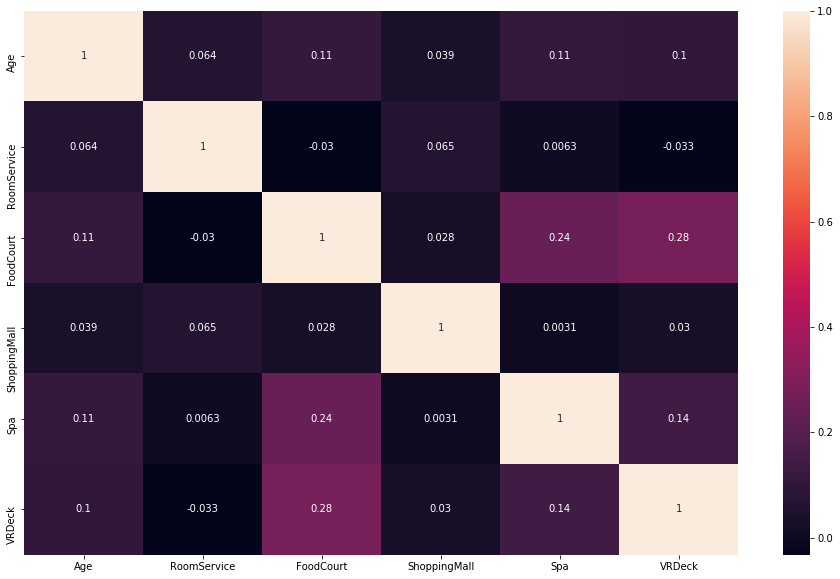

In [73]:
f, ax = plt.subplots(figsize=(16, 10))
RD = df_test.corr()
sns.heatmap(RD, ax=ax, annot=True)

In [74]:
#Drop Unncessarry column
df_train.drop('VIP', axis=1, inplace=True)
df_test.drop('VIP', axis=1, inplace=True)

#Preprocessing Data

##Drop Data Duplikat

In [75]:
#copy dataframe
data_train = df_train.copy()

In [76]:
#copy dataframe
data_test = df_test.copy()

In [77]:
#menghilangkan data duplicated
duplicate = data_train.duplicated()
print(duplicate.sum())

0


In [78]:
data_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [79]:
data_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

##Penanganan Missing Value

In [80]:
# Saya Bersihkan nilai yang hilang menggunakan Imputasi Nilai Acak Karena Ini cara terbaik untuk mempertahankan distribusi 
# Untuk setiap fitur.
def Random_value_imputation(feature):
    random_sample=data_train[feature].dropna().sample(data_train[feature].isna().sum())               
    random_sample.index=data_train[data_train[feature].isna()].index
    data_train.loc[data_train[feature].isnull(),feature]=random_sample

In [81]:
for col in data_train:
    Random_value_imputation(col)

In [82]:
totaldata = data_train.isna().sum().sort_values(ascending=False)
presentasedata = (data_train.isna().sum() / data_train.isna().count()).sort_values(ascending=False)

datahilang = pd.concat([totaldata, presentasedata], axis=1, keys=['Total', 'Percent'])
datahilang

,Total,Percent
Transported,0,0.0
Name,0,0.0
VRDeck,0,0.0
Spa,0,0.0
ShoppingMall,0,0.0
FoodCourt,0,0.0
RoomService,0,0.0
Age,0,0.0
Destination,0,0.0
Cabin,0,0.0


In [83]:
# Saya Bersihkan nilai yang hilang menggunakan Imputasi Nilai Acak Karena Ini cara terbaik untuk mempertahankan distribusi 
# Untuk setiap fitur.
def Random_value_imputation(feature):
    random_sample=data_test[feature].dropna().sample(data_test[feature].isna().sum())               
    random_sample.index=data_test[data_test[feature].isna()].index
    data_test.loc[data_test[feature].isnull(),feature]=random_sample

In [84]:
for col in data_test:
    Random_value_imputation(col)

In [85]:
totaldata = data_test.isna().sum().sort_values(ascending=False)
presentasedata = (data_test.isna().sum() / data_test.isna().count()).sort_values(ascending=False)

datahilang = pd.concat([totaldata, presentasedata], axis=1, keys=['Total', 'Percent'])
datahilang

,Total,Percent
Name,0,0.0
VRDeck,0,0.0
Spa,0,0.0
ShoppingMall,0,0.0
FoodCourt,0,0.0
RoomService,0,0.0
Age,0,0.0
Destination,0,0.0
Cabin,0,0.0
CryoSleep,0,0.0


In [86]:
data_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [87]:
data_testforsbs = data_test.copy()

In [88]:
#  Drop unnecessary columns

data_train.drop('PassengerId', axis=1, inplace=True)
data_train.drop('Name', axis=1, inplace=True)
# data_train.drop('Cabin', axis=1, inplace=True)

data_test.drop('PassengerId', axis=1, inplace=True)
data_test.drop('Name', axis=1, inplace=True)
# data_test.drop('Cabin', axis=1, inplace=True)

In [89]:
data_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True


In [90]:
data_train[['Deck', 'Num', 'Side']] = data_train['Cabin'].str.split('/', expand=True)
data_test[['Deck', 'Num', 'Side']] = data_test['Cabin'].str.split('/', expand=True)

In [91]:
data_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [92]:
data_test['Side'].value_counts()

P    2139
S    2138
Name: Side, dtype: int64

In [93]:
data_train['Deck'].value_counts()

F    2859
G    2621
E     898
B     795
C     768
D     487
A     259
T       6
Name: Deck, dtype: int64

In [94]:
UbahData = ['HomePlanet','CryoSleep','Destination','Transported', 'Deck', 'Side']
UbahData

['HomePlanet', 'CryoSleep', 'Destination', 'Transported', 'Deck', 'Side']

In [95]:
labelencoder = LabelEncoder()
for i in UbahData:
  data_train[i] = data_train[i].astype(str)
  data_train[i] = labelencoder.fit_transform(data_train[i])
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
HomePlanet      8693 non-null int32
CryoSleep       8693 non-null int32
Cabin           8693 non-null object
Destination     8693 non-null int32
Age             8693 non-null float64
RoomService     8693 non-null float64
FoodCourt       8693 non-null float64
ShoppingMall    8693 non-null float64
Spa             8693 non-null float64
VRDeck          8693 non-null float64
Transported     8693 non-null int32
Deck            8693 non-null int32
Num             8693 non-null object
Side            8693 non-null int32
dtypes: float64(6), int32(6), object(2)
memory usage: 679.2+ KB


In [96]:
data_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,0,B/0/P,2,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,0,0,F/0/S,2,24.0,109.0,9.0,25.0,549.0,44.0,1,5,0,1
2,1,0,A/0/S,2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1
3,1,0,A/0/S,2,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1
4,0,0,F/1/S,2,16.0,303.0,70.0,151.0,565.0,2.0,1,5,1,1


In [97]:
UbahData = ['HomePlanet','CryoSleep','Destination', 'Deck', 'Side']
UbahData

['HomePlanet', 'CryoSleep', 'Destination', 'Deck', 'Side']

In [98]:
labelencoder = LabelEncoder()
for i in UbahData:
  data_test[i] = data_test[i].astype(str)
  data_test[i] = labelencoder.fit_transform(data_test[i])
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
HomePlanet      4277 non-null int32
CryoSleep       4277 non-null int32
Cabin           4277 non-null object
Destination     4277 non-null int32
Age             4277 non-null float64
RoomService     4277 non-null float64
FoodCourt       4277 non-null float64
ShoppingMall    4277 non-null float64
Spa             4277 non-null float64
VRDeck          4277 non-null float64
Deck            4277 non-null int32
Num             4277 non-null object
Side            4277 non-null int32
dtypes: float64(6), int32(5), object(2)
memory usage: 317.5+ KB


In [99]:
data_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0,1,G/3/S,2,27.0,0.0,0.0,0.0,0.0,0.0,6,3,1
1,0,0,F/4/S,2,19.0,0.0,9.0,0.0,2823.0,0.0,5,4,1
2,1,1,C/0/S,0,31.0,0.0,0.0,0.0,0.0,0.0,2,0,1
3,1,0,C/1/S,2,38.0,0.0,6652.0,0.0,181.0,585.0,2,1,1
4,0,0,F/5/S,2,20.0,10.0,0.0,635.0,0.0,0.0,5,5,1


In [100]:
data_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,0,B/0/P,2,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,0,0,F/0/S,2,24.0,109.0,9.0,25.0,549.0,44.0,1,5,0,1
2,1,0,A/0/S,2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1
3,1,0,A/0/S,2,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1
4,0,0,F/1/S,2,16.0,303.0,70.0,151.0,565.0,2.0,1,5,1,1


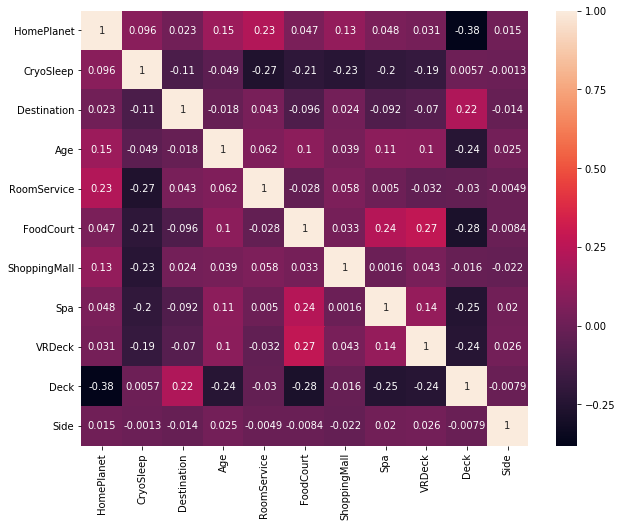

In [101]:
f, ax = plt.subplots(figsize=(10, 8))
RD = data_test.corr()
sns.heatmap(RD, ax=ax, annot=True)

In [102]:
# Drop unnecessary column

data_train.drop('Cabin', axis=1, inplace=True)
data_train.drop('Num', axis=1, inplace=True)

data_test.drop('Cabin', axis=1, inplace=True)
data_test.drop('Num', axis=1, inplace=True)

In [103]:
data_train.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,1,0,2,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0,0,2,24.0,109.0,9.0,25.0,549.0,44.0,1,5,1
2,1,0,2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1
3,1,0,2,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
4,0,0,2,16.0,303.0,70.0,151.0,565.0,2.0,1,5,1


In [104]:
age_groups = []
for i in data_train['Age']:
    if i <= 30:
        age_groups.append('0-30')
    if i > 30 and i <= 40:
        age_groups.append('30-40')
    if i > 40 and i <= 50:
        age_groups.append('40-50')
    if i > 50 and i <= 60:
        age_groups.append('50-60')
    if i > 60:
        age_groups.append('60+')
        
data_train['AgeGroup'] = age_groups

In [105]:
data_train.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,AgeGroup
0,1,0,2,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,30-40
1,0,0,2,24.0,109.0,9.0,25.0,549.0,44.0,1,5,1,0-30
2,1,0,2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,50-60
3,1,0,2,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,30-40
4,0,0,2,16.0,303.0,70.0,151.0,565.0,2.0,1,5,1,0-30


In [106]:
encoder = LabelEncoder()

data_train['AgeGroup']= encoder.fit_transform(data_train['AgeGroup'])
AgeGroup = {index : label for index, label in enumerate(encoder.classes_)}
AgeGroup

{0: '0-30', 1: '30-40', 2: '40-50', 3: '50-60', 4: '60+'}

In [107]:
age_groups = []
for i in data_test['Age']:
    if i <= 30:
        age_groups.append('0-30')
    if i > 30 and i <= 40:
        age_groups.append('30-40')
    if i > 40 and i <= 50:
        age_groups.append('40-50')
    if i > 50 and i <= 60:
        age_groups.append('50-60')
    if i > 60:
        age_groups.append('60+')
        
data_test['AgeGroup'] = age_groups

In [108]:
encoder = LabelEncoder()

data_test['AgeGroup']= encoder.fit_transform(data_test['AgeGroup'])
AgeGroup = {index : label for index, label in enumerate(encoder.classes_)}
AgeGroup

{0: '0-30', 1: '30-40', 2: '40-50', 3: '50-60', 4: '60+'}

In [109]:
data_train.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side,AgeGroup
0,1,0,2,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
1,0,0,2,24.0,109.0,9.0,25.0,549.0,44.0,1,5,1,0
2,1,0,2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,3
3,1,0,2,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,1
4,0,0,2,16.0,303.0,70.0,151.0,565.0,2.0,1,5,1,0


In [110]:
# Drop unnecessary column

data_train.drop('Age', axis=1, inplace=True)
data_test.drop('Age', axis=1, inplace=True)


In [111]:
data_test.head()

,HomePlanet,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,AgeGroup
0,0,1,2,0.0,0.0,0.0,0.0,0.0,6,1,0
1,0,0,2,0.0,9.0,0.0,2823.0,0.0,5,1,0
2,1,1,0,0.0,0.0,0.0,0.0,0.0,2,1,1
3,1,0,2,0.0,6652.0,0.0,181.0,585.0,2,1,1
4,0,0,2,10.0,0.0,635.0,0.0,0.0,5,1,0


In [112]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()

In [113]:
cols_to_norm = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
data_train[cols_to_norm] = data_train[cols_to_norm].apply(lambda x: ((x - x.min()) / (x.max() - x.min())*100 ))

data_test[cols_to_norm] = data_test[cols_to_norm].apply(lambda x: ((x - x.min()) / (x.max() - x.min())*100 ))

In [114]:
data_test.head()

,HomePlanet,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,AgeGroup
0,0,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,6,1,0
1,0,0,2,0.000000,0.035611,0.000000,14.225963,0.000000,5,1,0
2,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,2,1,1
3,1,0,2,0.000000,26.320579,0.000000,0.912114,2.626616,2,1,1
4,0,0,2,0.086453,0.000000,7.657984,0.000000,0.000000,5,1,0


In [115]:
x = data_train.drop('Transported', axis=1)
y = data_train['Transported']

In [116]:
x.head()

,HomePlanet,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,AgeGroup
0,1,0,2,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,1
1,0,0,2,0.760801,0.030188,0.106419,2.450018,0.182323,5,1,0
2,1,0,2,0.300133,11.994767,0.000000,29.966976,0.203041,0,1,3
3,1,0,2,0.000000,4.303492,1.579261,14.856301,0.799735,0,1,1
4,0,0,2,2.114888,0.234797,0.642772,2.521421,0.008287,5,1,0


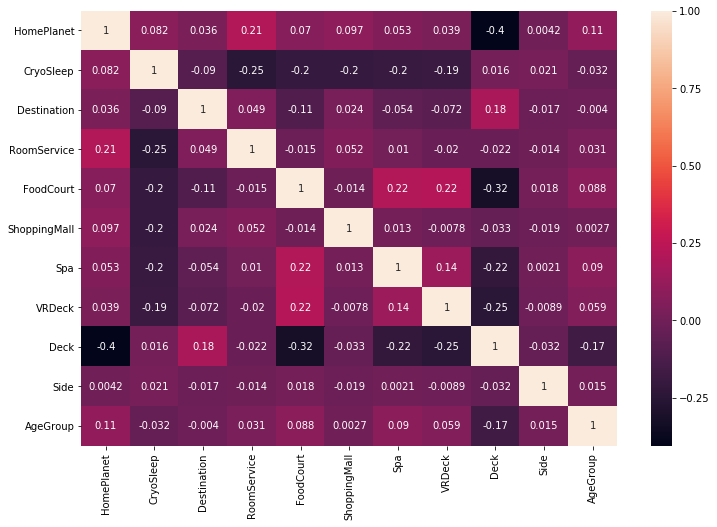

In [117]:
# now, plot the data

plt.figure(figsize=(12,8))
ax = sns.heatmap(x.corr(), annot=True)
plt.show()

In [118]:
from sklearn import tree

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.3)

# print the data
x_train

,HomePlanet,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side,AgeGroup
2333,0,0,2,0.000000,0.184483,0.000000,2.927526,0.000000,4,0,0
588,0,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,6,1,1
1235,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,4,1,0
3085,0,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,6,0,1
5660,2,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,5,1,0
8169,0,0,2,0.000000,1.985711,0.698110,0.000000,0.000000,6,0,4
6118,1,0,2,0.000000,12.806494,0.000000,8.376473,0.563544,3,0,0
368,0,0,2,4.788162,0.070439,0.000000,0.000000,7.040152,6,0,0
8534,2,0,2,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0
4506,1,0,2,0.000000,9.569651,0.000000,0.000000,6.903410,1,1,3


In [119]:
log_reg = linear_model.LogisticRegression(max_iter = 5000)
log_reg.fit(x_train, y_train)
log_reg_acc = 100*log_reg.score(x_test, y_test)
print('Logistic Regression Predictions: \n', log_reg.predict(x_test), '\n Accuracy:', log_reg_acc, '%')

Logistic Regression Predictions: 
 [1 0 1 ... 0 1 1] 
 Accuracy: 78.45092024539878 %


In [120]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
# from sklearn.svm import SVC
# clf = SVC()

# clf.fit(x_train,y_train)

In [122]:
pred = clf.predict(x_test)

In [123]:
y_test

5549    1
6550    0
8571    1
2739    0
8429    1
785     1
3771    0
2915    0
1585    0
7939    1
5396    0
3361    1
1372    1
6251    1
8076    1
1232    1
376     0
1090    0
581     0
3946    1
3858    1
8582    0
682     1
1942    1
5845    1
1779    0
7645    1
7379    1
4440    1
8483    1
       ..
767     0
8355    1
3509    0
8033    1
8059    0
2410    0
4952    0
3789    0
1390    0
278     1
2657    0
6993    1
1882    1
7572    1
3698    1
7525    0
4499    0
5336    1
2143    0
8538    1
3788    0
1693    0
5041    0
3454    0
5214    0
8105    1
4008    1
2964    0
4328    1
6411    1
Name: Transported, Length: 2608, dtype: int32

In [124]:
clf.score(x_test,y_test)

0.7845092024539877

In [125]:
fnl = clf.predict(data_test)
fnl

array([1, 0, 1, ..., 1, 1, 1])

In [126]:
fnl = pd.DataFrame(fnl,columns=['Transported'])
fnl

,Transported
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [127]:
def transformTo_bool(x):
    if x < 0.4:
        return False
    else:
        return True

fnl['Transported'] = fnl['Transported'].apply(transformTo_bool)

print(fnl)

      Transported
0            True
1           False
2            True
3            True
4            True
5            True
6            True
7            True
8            True
9            True
10          False
11          False
12           True
13           True
14          False
15          False
16          False
17           True
18           True
19          False
20           True
21          False
22           True
23           True
24           True
25          False
26           True
27           True
28          False
29           True
...           ...
4247        False
4248         True
4249         True
4250        False
4251         True
4252        False
4253         True
4254        False
4255         True
4256         True
4257        False
4258         True
4259        False
4260         True
4261        False
4262         True
4263        False
4264        False
4265         True
4266         True
4267         True
4268         True
4269         True
4270      

In [128]:
fnl = pd.DataFrame(fnl,columns=['Transported'])
sub = pd.concat([data_testforsbs['PassengerId'],fnl['Transported']],axis=1)

sub.set_index('PassengerId',inplace=True)

sub.to_csv("submission.csv")

# submission.to_csv('submission.csv', header=True, index=False)

In [129]:
dff = pd.read_csv('submission.csv')
dff.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [130]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=5,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(x_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.8011503697617092
RandomForestClassifierModel Test Score is :  0.7868098159509203
RandomForestClassifierModel features importances are :  [0.05054322 0.24699005 0.00788716 0.1804402  0.07781619 0.07636686
 0.15159212 0.13801898 0.05987806 0.00730403 0.00316313]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [0 0 1 0 1 1 1 0 0 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.68439282 0.31560718]
 [0.79950883 0.20049117]
 [0.06464563 0.93535437]
 [0.75958006 0.24041994]
 [0.04730411 0.95269589]
 [0.3922524  0.6077476 ]
 [0.47777277 0.52222723]
 [0.64197195 0.35802805]
 [0.785687   0.214313  ]
 [0.74424761 0.25575239]]


In [131]:
svm = svm.SVC(kernel='linear')
svm.fit(x_train, y_train)
svm_acc = 100*svm.score(x_test, y_test)
print('SVM Predictions: \n', svm.predict(x_test), '\n Accuracy:', svm_acc, '%')

SVM Predictions: 
 [0 0 1 ... 0 1 1] 
 Accuracy: 78.06748466257669 %


In [132]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
knn_acc = 100*knn.score(x_test, y_test)
print('K-Nearest Neighbours Predictions: \n', knn.predict(x_test), '\n Accuracy:', knn_acc, '%')

K-Nearest Neighbours Predictions: 
 [0 0 1 ... 0 1 0] 
 Accuracy: 78.48926380368098 %


In [133]:
nb = naive_bayes.GaussianNB()
nb.fit(x_train, y_train)
nb_acc = 100*nb.score(x_test, y_test)
print('Naive Bayes Predictions: \n', nb.predict(x_test), '\n Accuracy:', nb_acc, '%')

Naive Bayes Predictions: 
 [1 0 1 ... 0 1 1] 
 Accuracy: 71.54907975460122 %


In [134]:
from sklearn.tree import DecisionTreeClassifier 
# Import Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 


tree = DecisionTreeClassifier(max_depth=3, random_state=23)

# The baggging ensemble classifier is initialized with:

bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

# Training
bagging.fit(x_train, y_train)

# Evaluating
print(f"Train score: {bagging.score(x_train, y_train)}")
print(f"Test score: {bagging.score(x_test, y_test)}")

# Train Decision Tree Classifer
tree = tree.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = tree.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Train score: 0.7441248972884141
Test score: 0.7580521472392638
Accuracy: 0.7227760736196319
